In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593763,
 1.0195904306706842)

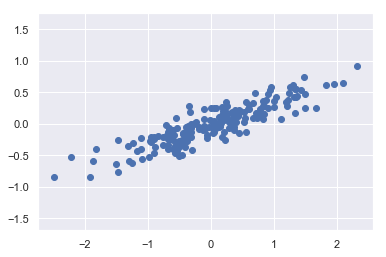

In [179]:
rng = np.random.RandomState(1)
X  =np.dot(rng.rand(2,2), rng.randn(2, 200)).T
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')


In [180]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [181]:
print(pca.components_, pca.explained_variance_)


[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]] [0.7625315 0.0184779]


In [182]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle = '->',
                     linewidth = 2, color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    

In [183]:
projected = pca.transform(X) 

[2.65000091 0.01486687]
[0.03030942 0.42266714]


Text(0.5, 1.0, 'Principal component')

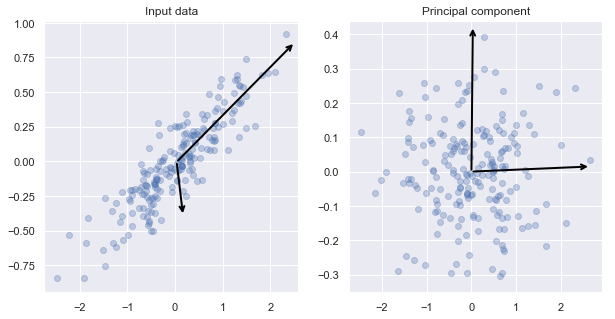

In [191]:
fig, ax  = plt.subplots(1,2, figsize = (10,5))

ax[0].scatter(X[:,0], X[:, 1], alpha=0.3)
for lenght, vector in zip(pca.explained_variance_, pca.components_ ):
    v = vector * 3 * np.sqrt(lenght)
    draw_vector(pca.mean_, pca.mean_ - v, ax[0])
ax[0].set_title('Input data')


ax[1].scatter(projected[:,0], projected[:, 1], alpha=0.3)
for lenght, vector in zip(pca.explained_variance_, pca.components_ ):
    v = vector * 3 * np.sqrt(lenght)
    v = pca.transform(v[:, np.newaxis].T).reshape(-1) #В общем здесь были сложности с размернотью
    pca.mean = pca.transform(pca.mean_[:, np.newaxis].T).reshape(-1)
    print(v)
    draw_vector(pca.mean, pca.mean + v, ax[1])
ax[1].set_title('Principal component')


Text(1, 1, 'dsd')

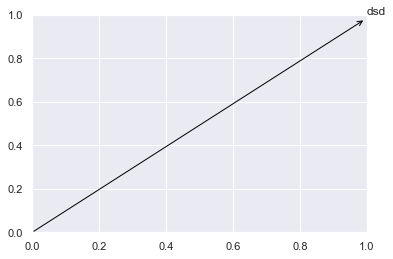

In [208]:
plt.annotate('dsd', [0,0], [1,1], arrowprops=dict( arrowstyle='<-', color = 'black'))

### PCA as dimension reduction

In [211]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print('oroginal shape:      ', X.shape)
print('transformation shape:', X_pca.shape)

oroginal shape:       (200, 2)
transformation shape: (200, 1)


(-2.77152878069022, 2.661757596590676, -0.9964674432667124, 1.0219081775900811)

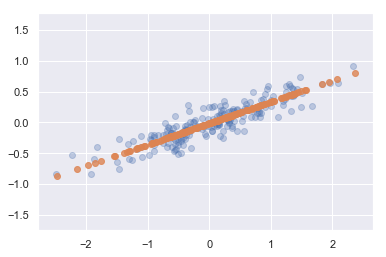

In [227]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:,0], X[:, 1], alpha=0.3)
plt.scatter(X_new[:,0], X_new[:, 1], alpha=0.8)

plt.axis('equal')


In [228]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [234]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


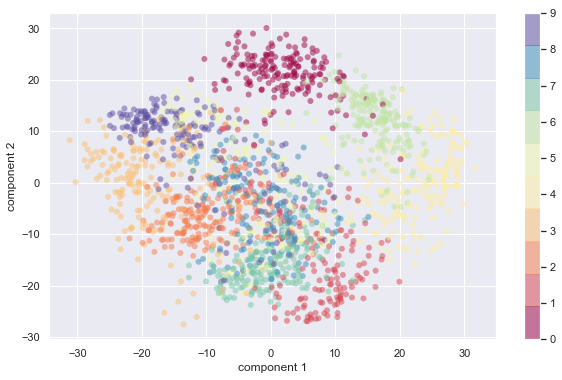

In [258]:
plt.figure(figsize=(10,6))
plt.scatter(projected[:, 0],projected[:, 1],
            c = digits.target, edgecolor='none',  alpha=0.5,
            cmap =plt.cm.get_cmap('Spectral', 10))
plt.ylabel('component 2')
plt.xlabel('component 1')
plt.colorbar()


(0, 20)

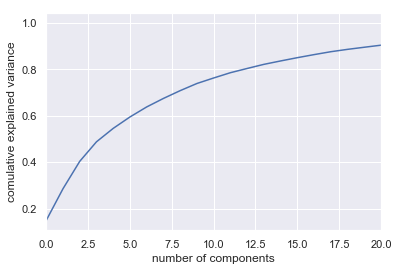

In [261]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('comulative explained variance')


### PCA as Noise Filtering

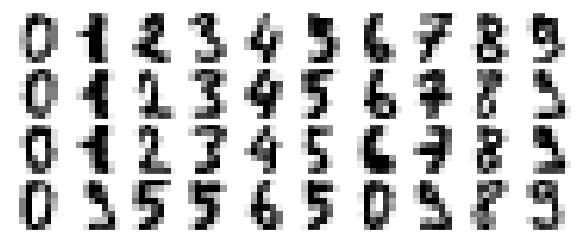

In [269]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize = (10,4),
                           subplot_kw={'xticks':[], 'yticks':[]},
                          gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8), cmap = 'binary',
                  interpolation = 'nearest')
        
plot_digits(digits.data)

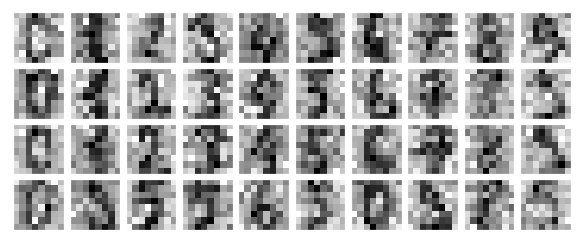

In [294]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [338]:
pca = PCA(0.45).fit(noisy) # Можно сразу задать процент сохранненной вариации
pca.n_components_

(9, 64)

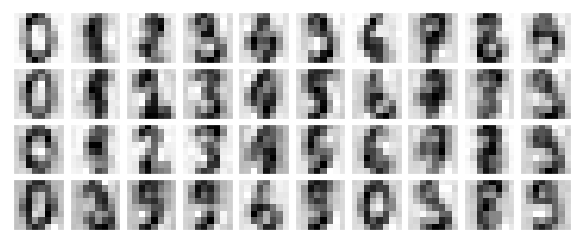

In [313]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

## Example: Eigenfaces

In [344]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder' 'Junichiro Koizumi']
(820, 62, 47)


In [345]:
from sklearn.decomposition import PCA

pca = PCA(150, svd_solver='randomized')
pca.fit(faces.data)
pca.components_[0].shape

(2914,)

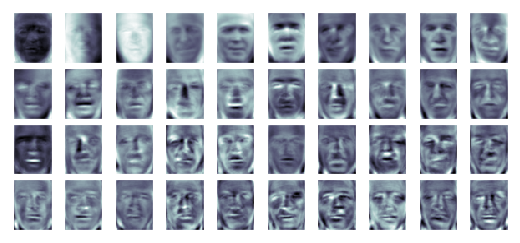

In [351]:
fig, axes = plt.subplots(4, 10, figsize = (9,4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
for i , ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')
        

Text(0, 0.5, 'Cumulative sum')

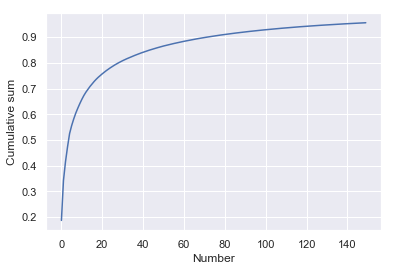

In [352]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number')
plt.ylabel('Cumulative sum')

In [355]:
pca = PCA(150, svd_solver='randomized').fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)



(820, 2914)

Text(0, 0.5, '150 dim recon')

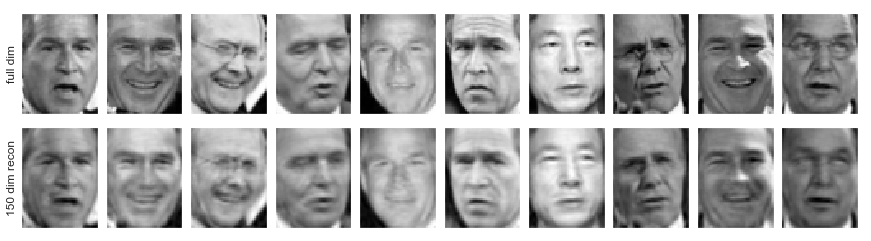

In [368]:
fig, ax = plt.subplots(2, 10, figsize = (15,4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62,47), cmap = 'binary_r')
    ax[1, i].imshow(projected[i].reshape(62,47), cmap = 'binary_r')
ax[0][0].set_ylabel('full dim')
ax[1][0].set_ylabel('150 dim recon')
